### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complaints=pd.read_csv('311-service-requests.csv',dtype='unicode')
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

### 2. What's even in it? (the summary)


### The data is various complaints sent to local police departments. It gives the time, police station, type of complaint, and long/lat location

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [4]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [5]:
complaints.sample

<bound method NDFrame.sample of        Unique Key            Created Date             Closed Date Agency  \
0        26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1        26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2        26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3        26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4        26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   
...           ...                     ...                     ...    ...   
111064   26426013  10/04/2013 12:01:13 AM  10/07/2013 04:07:16 PM    DPR   
111065   26428083  10/04/2013 12:01:05 AM  10/04/2013 02:13:50 AM   NYPD   
111066   26428987  10/04/2013 12:00:45 AM  10/04/2013 01:25:01 AM   NYPD   
111067   26426115  10/04/2013 12:00:28 AM  10/04/2013 04:17:32 AM   NYPD   
111068   26428033  10/04/2013 12:00:10 AM  10/04/2013 01:20:52 AM   NYPD   

                                    Agency Name        

In [6]:
complaints.describe()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,111069,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143,98143,98143
unique,111069,57872,35596,26,135,165,788,90,248,41189,...,37,38,2,160,17,2,39,50653,50505,50653
top,26589651,10/24/2013 12:00:00 AM,10/28/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,40.842708163812766,-73.93675169432969,"(40.842708163812766, -73.93675169432969)"
freq,1,3659,1359,39067,39067,14200,14126,39067,1996,120,...,24,22,127,11,12,13,14,120,120,120


### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [7]:
complaints.columns =[column.replace(" ", "_") for column in complaints.columns]

### 3. Which month and year the complains received?


In [8]:
complaints['Created_Date']=pd.to_datetime(complaints['Created_Date'])

In [9]:
complaints['month']=complaints['Created_Date'].dt.month

In [10]:
complaints.value_counts('month')

month
10    111069
dtype: int64

In [11]:
complaints['year']=complaints['Created_Date'].dt.year

In [12]:
complaints.value_counts('year')

year
2013    111069
dtype: int64

### All complaints are from October 2013

### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

In [13]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [14]:
complaints.drop(['Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name'], axis=1, inplace=True)

In [15]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name', 'Latitude', 'Longitude',
       'Location', 'month', 'year'],
      dtype='object')

### We removed the following columns because their rows were filled with "NA"

## 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

In [16]:
complaints.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

### I would recomend using a constant for all three of these (We don't want to assume anything). However, I will use mode on Address_Type for practice

In [17]:
complaints['Street_Name'].fillna('Unknown', inplace=True)

In [18]:
AT_mode=complaints['Address_Type'].mode()[0]
print(AT_mode)

ADDRESS


In [19]:
complaints['Address_Type'].fillna(AT_mode, inplace=True)

In [20]:
complaints['City'].fillna('Unknown', inplace=True)

In [21]:
complaints.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                            0
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                           0
City                                   0
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

### City, Address Type, and Street Name now have 0 null's

### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

### Heating, Construction, Light Condotion, Lit Request, and Plumbing the most common complaints

<AxesSubplot:>

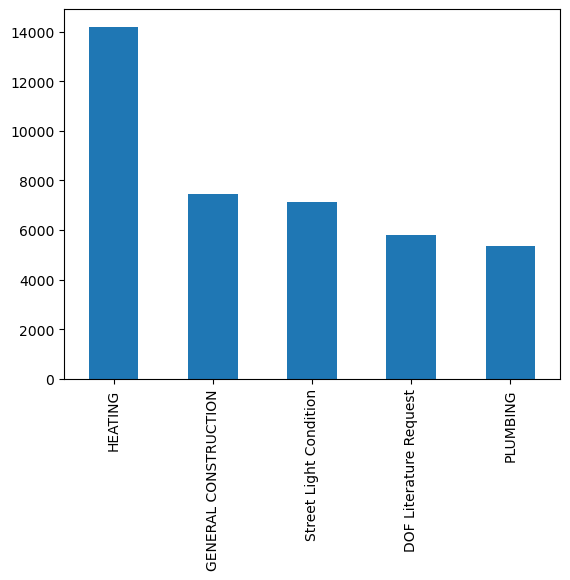

In [22]:
complaints['Complaint_Type'].value_counts().head(5).plot(kind="bar")

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

### The Boroughs with the most complaints are Brooklyn, Manhattan, Queens, and Bronx

<AxesSubplot:>

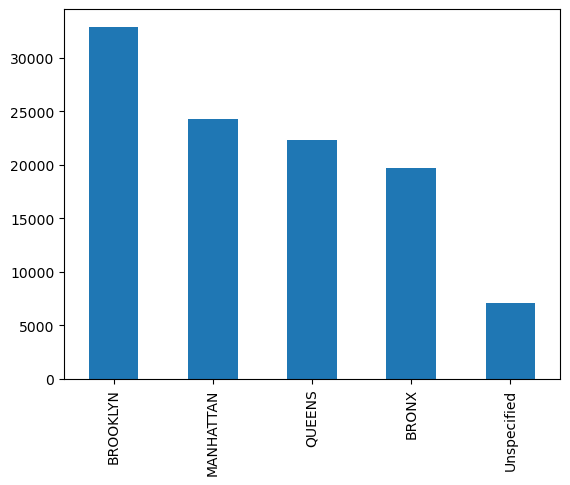

In [23]:
complaints['Borough'].value_counts().head(5).plot(kind="bar")

### 8. Which agency received the most complain and which one least?

In [24]:
complaints['Agency'].value_counts()

HPD      39067
DOT      17707
NYPD     15295
DEP       8897
DSNY      8385
DOF       6370
DPR       4614
DOHMH     3237
DOB       3014
TLC       1491
DCA       1405
FDNY       631
HRA        392
DHS        101
EDC         99
DOE         97
3-1-1       92
CHALL       77
DOITT       31
OEM         29
DFTA        22
OPS          8
OATH         4
DOP          2
COIB         1
OMB          1
Name: Agency, dtype: int64

### HPD recieved the most and OMB and COIB recieved the least complaints

## 9. Investigate the data set and look for meaningful information for two more questions (Indivijual/ discuss with partner)
We will discuss the new findings in Tueaday's class

<AxesSubplot:>

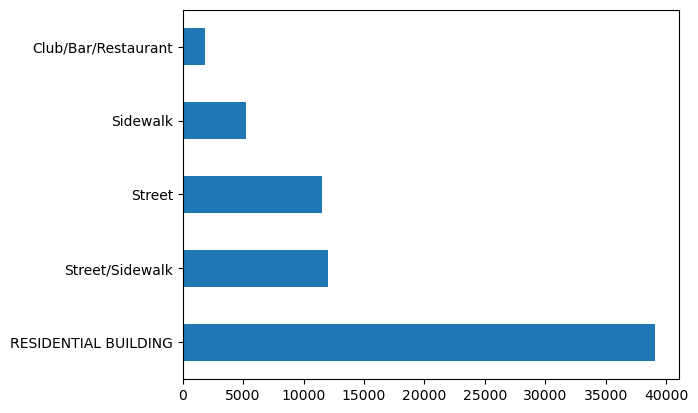

In [25]:
complaints['Location_Type'].value_counts().head(5).plot(kind="barh")

### They recieve the most complaints when it comes to residential buildings

<AxesSubplot:ylabel='Status'>

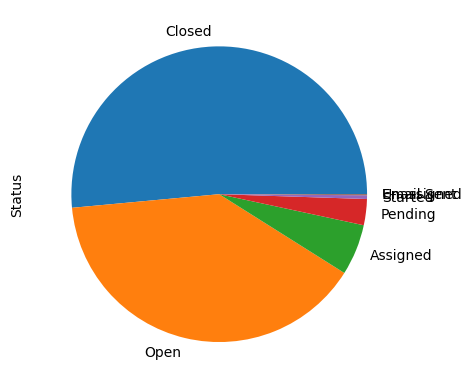

In [26]:
complaints['Status'].value_counts().plot(kind="pie")

### The departments have successfully closed the majority of cases

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

In [27]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name', 'Latitude', 'Longitude',
       'Location', 'month', 'year'],
      dtype='object')

In [28]:
new_complaints=complaints.query('Complaint_Type=="Illegal Parking" & Borough=="QUEENS"')
len(new_complaints)


887

### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [29]:
new_complaints=new_complaints[['Complaint_Type','Created_Date','Descriptor']]

In [30]:
new_complaints.to_csv('newdata',index=False)

### 12. Load it back to verify the data

In [31]:
df=pd.read_csv('newdata',index_col=[0])

In [32]:
df.head()

,Created_Date,Descriptor
Complaint_Type,,
Illegal Parking,2013-10-31 02:01:04,Commercial Overnight Parking
Illegal Parking,2013-10-30 23:20:57,Blocked Hydrant
Illegal Parking,2013-10-30 23:20:26,Posted Parking Sign Violation
Illegal Parking,2013-10-30 23:01:49,Commercial Overnight Parking
Illegal Parking,2013-10-30 22:33:28,Commercial Overnight Parking
